<a href="https://colab.research.google.com/github/mr-cri-spy/machine-_-learning-/blob/main/Salary_Prediction__Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
### Flow of ML --> Split Data -> Build Model -> Train Model -> Test & Evaluate
## Feature (x)  -- It should always be 2D (no of samples, no of features) -- (30,1)
## Target (x)  -- It should either 1d (no of samples,) or 2D (no of samples, no of target) -- (30,1)

In [ ]:
#x = np.array(data['YearsExperience']).reshape(30,1)
x = data[['YearsExperience']].values
y = data['Salary'].values
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=9014)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(24, 1)
(24,)
(6, 1)
(6,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytest

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [ ]:
ypred = model.predict(xtest)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.99842716176972

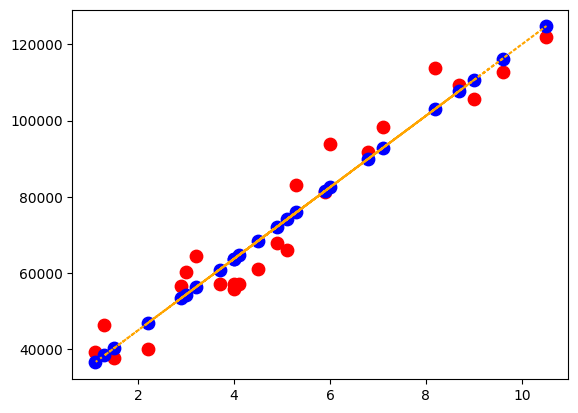

In [ ]:
### LOR for the training samples
plt.scatter(xtrain,ytrain,color="red",s=80)
plt.scatter(xtrain,model.predict(xtrain),color="blue",s=80)
plt.plot(xtrain,model.predict(xtrain),color="orange",linestyle="dotted")
plt.show()

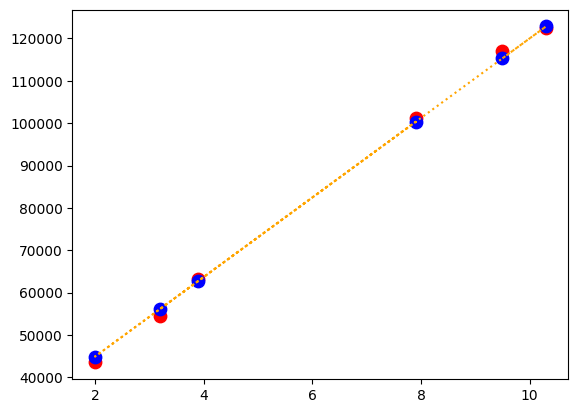

In [ ]:
### LOR for the testing samples
plt.scatter(xtest,ytest,color="red",s=80)
plt.scatter(xtest,model.predict(xtest),color="blue",s=80)
plt.plot(xtest,model.predict(xtest),color="orange",linestyle="dotted")
plt.show()

Get the random state value for best accuracy

In [ ]:
scores = []
for i in range(0,10000):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  new_model = LinearRegression()
  new_model.fit(xtrain1,ytrain1)
  ypred1 = new_model.predict(xtest1)
  scores.append(r2_score(ytest1,ypred1))

In [ ]:
np.argmax(scores)

9014

In [ ]:
scores[9014]

0.99842716176972

In [ ]:
m = model.coef_
c = model.intercept_
print(m,c)

[9385.56304023] 26148.74880284306


In [ ]:
print(f"y = {m[0]}x + {c}")

y = 9385.56304022648x + 26148.74880284306


In [ ]:
m * 1.5 + c

array([40227.09336318])